<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/Assigment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1

### (a) Load the data into memory. Make an appropriate X matrix and y vector.   

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Assignement 1/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11,12,13
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [ ]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
# convert the columns ca and thal that contained numeric data in the form of string
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [ ]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# handle null values
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Create binary target: 0 = no disease, 1 = has disease
# the dataset originally contained 0 for no disease adn 1,2,3,4 for level of heart disease
# 1,2,3,4 transformed to 1 to show that disease exists making the target variable binary
df['target'] = (df['num'] > 0).astype(int)
df = df.drop('num', axis=1)
print(df[['target']].value_counts())


target
0         164
1         140
Name: count, dtype: int64


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
300,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
301,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
302,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [ ]:
y

,target
0,1
1,0
2,1
3,1
4,0
...,...
299,1
300,1
301,1
302,1


### (b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

### (c) Give the objective of logistic regression with L2 regularization.


- Logistic regression predicts the probability of a binary outcome.
- L2 regularization is used to fix the problem of overfitting
- L2 regularization reduces the weights of the coefficients of the model but never makes them 0
-  objective function of logistic regression with L2 regularization is to minimize the cross-entropy loss plus a penalty proportional to the sum of squares of the weights.
- This encourages the model to fit the data well while keeping the weights small, which improves generalization on unseen data.

### (d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_loss = []
test_loss = []
weight_norms = []
all_weights = []
train_acc = []
test_acc = []

for lam in lambdas:
    # In sklearn, regularization strength C = 1 / lambda
    C = 1e12 if lam == 0 else 1/lam  # Avoid division by zero for lambda=0
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Cross-entropy loss
    train_loss.append(log_loss(y_train, y_train_prob))
    test_loss.append(log_loss(y_test, y_test_prob))

    # L2 norm of weight vector
    w = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(w))
    all_weights.append(w)

    # Accuracy
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

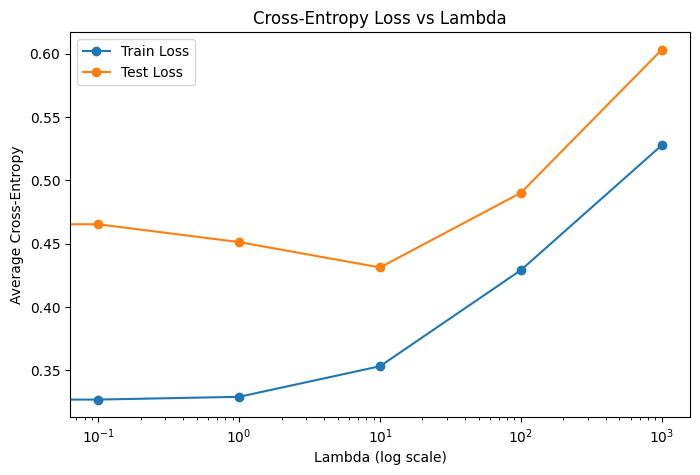

In [ ]:
# Convert list of weight vectors to array for plotting each weight
all_weights = np.array(all_weights)

# Plot 1: Cross-entropy vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy Loss vs Lambda')
plt.legend()
plt.show()


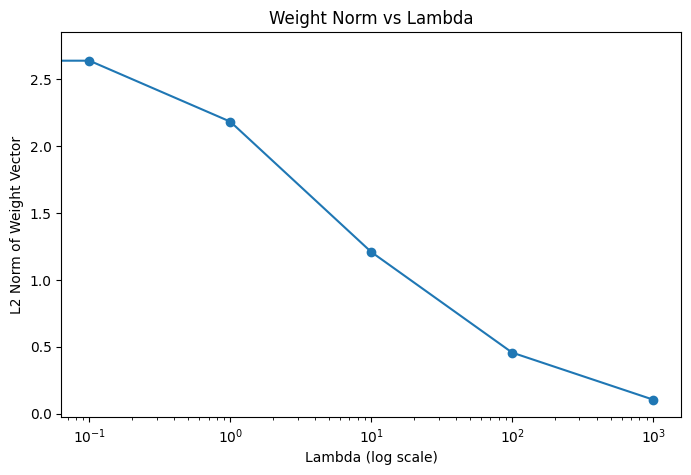

In [ ]:
# Plot 2: L2 norm of weight vector vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('Weight Norm vs Lambda')
plt.show()

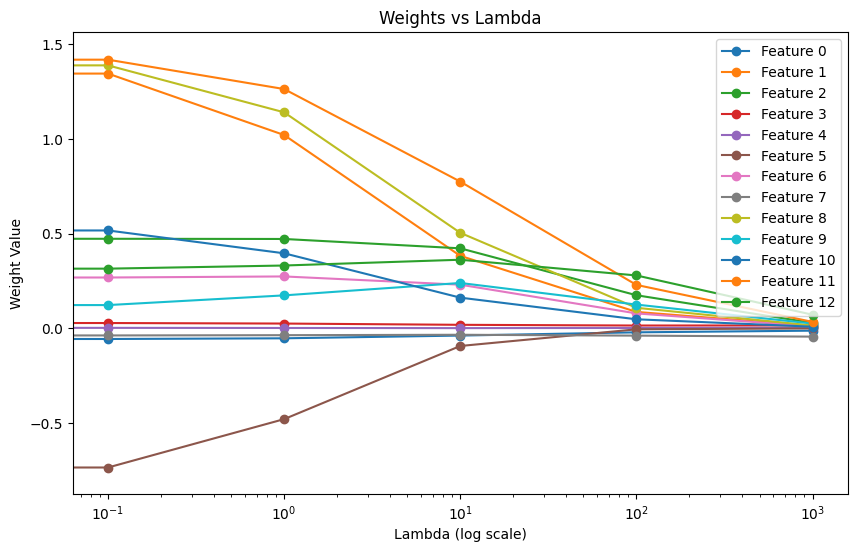

In [ ]:
# Plot 3: Actual weights vs lambda
plt.figure(figsize=(10,6))
for i in range(all_weights.shape[1]):
    plt.plot(lambdas, all_weights[:,i], marker='o', label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Weight Value')
plt.title('Weights vs Lambda')
plt.legend()
plt.show()

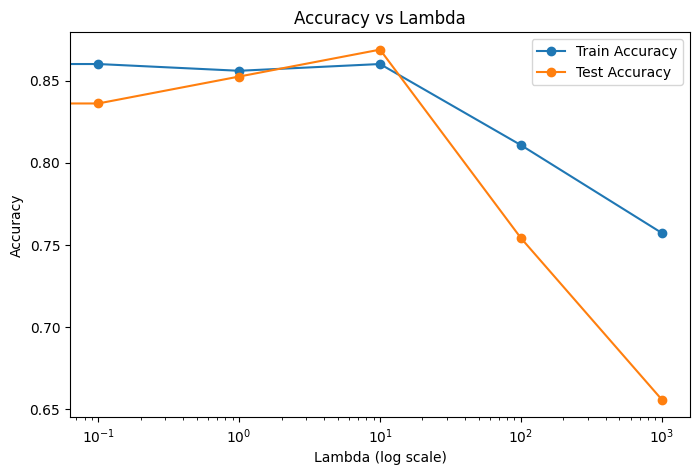

In [ ]:
# Plot 4: Accuracy vs lambda
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.show()

### (e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [ ]:
def gaussian_basis(X, num_bases=5, sigma=1.0, feature_range=(-10,10)):
    n_samples, n_features = X.shape
    means = np.linspace(feature_range[0], feature_range[1], num_bases)

    X_transformed = []

    for i in range(n_features):
        # Apply each basis function to feature i
        for mu in means:
            phi = np.exp(-(X[:,i] - mu)**2 / (2 * sigma**2))
            X_transformed.append(phi)

    # Stack all basis features horizontally
    return np.column_stack(X_transformed)

In [ ]:
print("Original X_train shape:", X_train.shape)
for sigma in [0.1, 0.5, 1, 5, 10]:
    X_train_gauss = gaussian_basis(X_train.values, num_bases=5, sigma=sigma)
    X_test_gauss  = gaussian_basis(X_test.values, num_bases=5, sigma=sigma)
    print("Transformed X_train shape:", X_train_gauss.shape)

Original X_train shape: (243, 13)
Transformed X_train shape: (243, 65)
Transformed X_train shape: (243, 65)
Transformed X_train shape: (243, 65)
Transformed X_train shape: (243, 65)
Transformed X_train shape: (243, 65)


### (f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.

In [ ]:
sigmas = [0.1, 0.5, 1, 5, 10]
train_loss_sigma = []
test_loss_sigma = []

for sigma in sigmas:
    # Transform features
    X_train_gauss = gaussian_basis(X_train.values, num_bases=5, sigma=sigma)
    X_test_gauss  = gaussian_basis(X_test.values, num_bases=5, sigma=sigma)

    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    model.fit(X_train_gauss, y_train)

    # Compute cross-entropy loss
    y_train_prob = model.predict_proba(X_train_gauss)[:,1]
    y_test_prob  = model.predict_proba(X_test_gauss)[:,1]

    train_loss_sigma.append(log_loss(y_train, y_train_prob))
    test_loss_sigma.append(log_loss(y_test, y_test_prob))


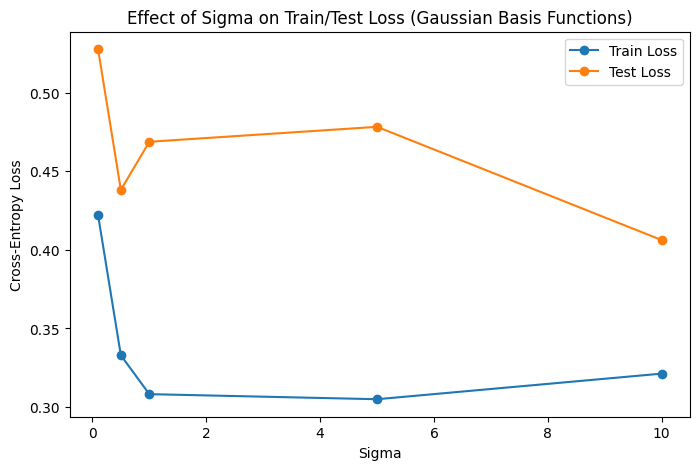

In [ ]:
# Plot training and testing error vs sigma

plt.figure(figsize=(8,5))
plt.plot(sigmas, train_loss_sigma, marker='o', label='Train Loss')
plt.plot(sigmas, test_loss_sigma, marker='o', label='Test Loss')
plt.xlabel('Sigma')
plt.ylabel('Cross-Entropy Loss')
plt.title('Effect of Sigma on Train/Test Loss (Gaussian Basis Functions)')
plt.legend()
plt.show()

#### Observations
##### sigma = 0.1

- **Training Error**: High  
- **Testing Error**: Very High  
- **Underfitting**: The basis functions are too narrow, acting like nearly zero unless exactly centered. The model struggles to learn.

##### sigma = 0.5

- **Training Error**: Drops sharply  
- **Testing Error**: **Lowest**  
-  **Sweet spot** — good expressive power without overfitting  
-  Gaussian bumps are narrow enough to capture structure, but not too localized

##### sigma = 1

- **Testing Error**: Slightly worse than σ = 0.5
- **Still a good bias-variance trade-off**


##### sigma = 5, 10

- **Training Error**: Low  
- **Testing Error**: Alsmost similar to previous  
- **Underfitting due to over-smoothing**:  
  - Basis functions are too wide  
  - Features become too similar  
  - Loss of discriminative power



### (g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# List of sigma values
sigmas = [0.1, 0.5, 1, 5, 10]

# Regularization parameters
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# Step 1: create full Gaussian basis features for all σ
X_train_all = np.hstack([gaussian_basis(X_train.values, sigma=s) for s in sigmas])
X_test_all  = np.hstack([gaussian_basis(X_test.values,  sigma=s) for s in sigmas])

# Lists to store results
train_loss_list = []
test_loss_list = []
weight_norm_list = []
weight_norm_per_sigma = {s: [] for s in sigmas}

num_features_per_sigma = gaussian_basis(X_train.values, sigma=sigmas[0]).shape[1]

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=2000)
    else:
        C = 1 / lam
        model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=2000)

    model.fit(X_train_all, y_train)

    # Predict
    y_train_prob = model.predict_proba(X_train_all)[:,1]
    y_test_prob  = model.predict_proba(X_test_all)[:,1]

    # Cross-entropy loss
    train_loss_list.append(log_loss(y_train, y_train_prob))
    test_loss_list.append(log_loss(y_test, y_test_prob))

    # Full L2 norm of weight vector
    w = model.coef_.flatten()
    weight_norm_list.append(np.linalg.norm(w))

    # L2 norm per sigma block
    for i, s in enumerate(sigmas):
        start = i * num_features_per_sigma
        end   = start + num_features_per_sigma
        weight_norm_per_sigma[s].append(np.linalg.norm(w[start:end]))




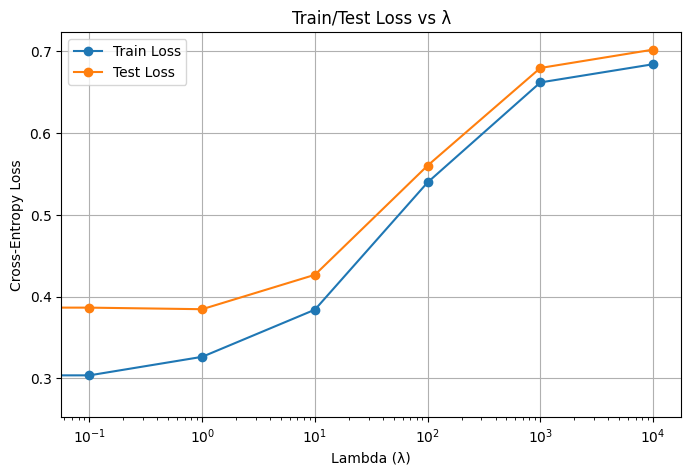

In [ ]:
# Cross-entropy loss
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss_list, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss_list, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Train/Test Loss vs λ')
plt.legend()
plt.grid(True)
plt.show()


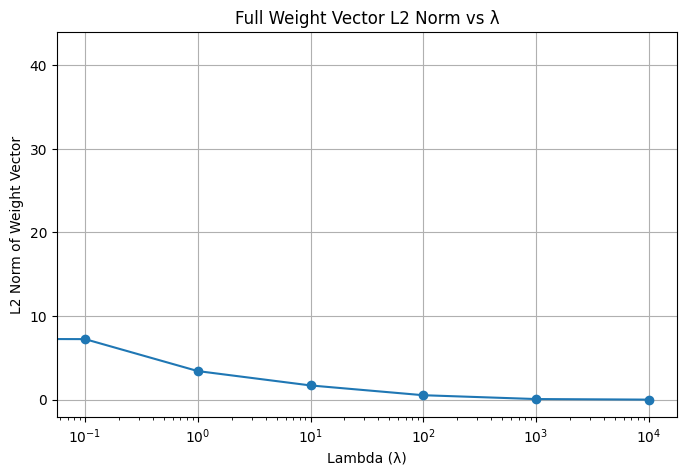

In [ ]:
# Full weight L2 norm
plt.figure(figsize=(8,5))
plt.plot(lambdas, weight_norm_list, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('Full Weight Vector L2 Norm vs λ')
plt.grid(True)
plt.show()

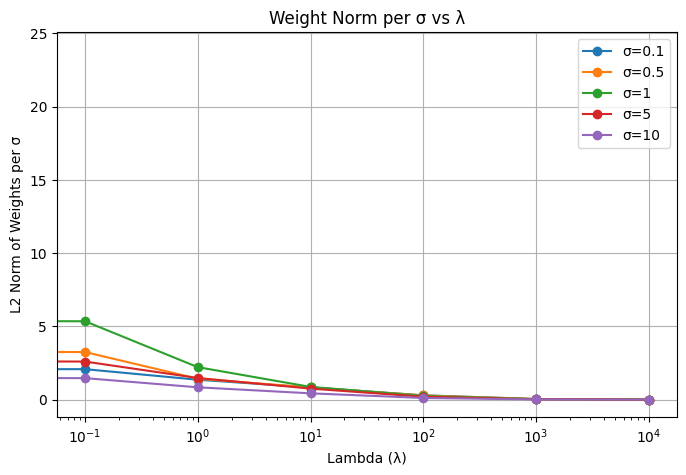

In [ ]:
# Weight L2 norm per σ
plt.figure(figsize=(8,5))
for s in sigmas:
    plt.plot(lambdas, weight_norm_per_sigma[s], marker='o', label=f'σ={s}')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Weights per σ')
plt.title('Weight Norm per σ vs λ')
plt.legend()
plt.grid(True)
plt.show()


#### Train/Test Loss vs. Lambda
- **Small λ (0.1-10):**  
  - Good balance between fitting and regularization.  
  - Slight increase in loss as model complexity is penalized.  
  - Test loss remains low.  

- **Large λ (100-10,000):**  
  - Severe underfitting occurs.  
  - Regularization dominates, forcing the model to be too simple.  
  - Sharp rise in both training and test loss.

#### Full Weight Vector L2 Norm vs. Lambda
- Confirms the effect of L2 regularization.  
- As λ increases, the norm of the weight vector decreases sharply.  
- Indicates that weights are being shrunk towards zero.

#### Weight Norm per σ vs. Lambda
- **Smaller σ (narrower basis functions):**  
  - Start with a higher weight norm, indicating higher model complexity.  

- **All σ values:**  
  - Increasing λ consistently shrinks their respective weight norms.  
  - Reduces their contribution to the model.


### (h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).

- **Designing Gaussian basis functions to capture relationships between inputs:**  
  - Instead of only univariate Gaussians for each feature, create **multivariate Gaussian basis functions** that depend on multiple features at once.  
  - More generally, you could use **full covariance matrices** to model interactions between features.  
  - This allows the model to capture **nonlinear interactions** between inputs that univariate Gaussians cannot.  

- **Impact on bias-variance trade-off:**  
  - **Bias decreases** because the model can now fit more complex patterns in the data.  
  - **Variance increases** because more parameters and interactions make the model more flexible and prone to overfitting.  
  - Stronger regularization (e.g., larger lambda in L2) may be necessary to control variance while maintaining low bias.  

- **Summary:** Using multivariate Gaussian bases improves the model's ability to capture complex feature relationships, but it increases the risk of overfitting, so careful selection of σ and regularization is crucial.


## Part 2

### Linear Regression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Assignement 1/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df = df.drop(columns=['region'])


In [ ]:
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
charges,float64


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0


#### Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df[['age']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

simple_linear = LinearRegression()
simple_linear.fit(X_train, y_train)

y_predict = simple_linear.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

print("Simple Linear Regression Evaluation:")
print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)


Simple Linear Regression Evaluation:
MSE : 135983957.4805469
MAE : 9173.258196746589
RMSE: 11661.21595205864


In [ ]:
print("Intercept (b0):", simple_linear.intercept_)
print("Slope (b1):", simple_linear.coef_[0])


Intercept (b0): 3876.928684191691
Slope (b1): 240.59655978877493


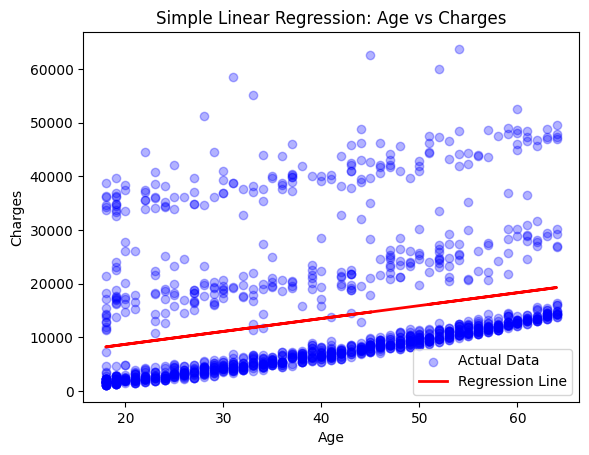

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')

plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: Age vs Charges')
plt.legend()
plt.show()


#### Multi Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error

X = df.drop(["charges"], axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("Multiple Linear Regression Results")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


Multiple Linear Regression Results
MSE: 33979257.05080821
RMSE: 5829.17293025419
MAE: 4213.484797807137


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Intercept (b0):", multi_model.intercept_)
for feature, coef in zip(X.columns, multi_model.coef_):
    print(f"Slope for {feature}: {coef}")

Intercept (b0): -12113.451250917095
Slope for age: 257.068962278136
Slope for sex: -7.951788365792368
Slope for bmi: 327.5335135360791
Slope for children: 427.25443050937037
Slope for smoker: 23653.90331474121


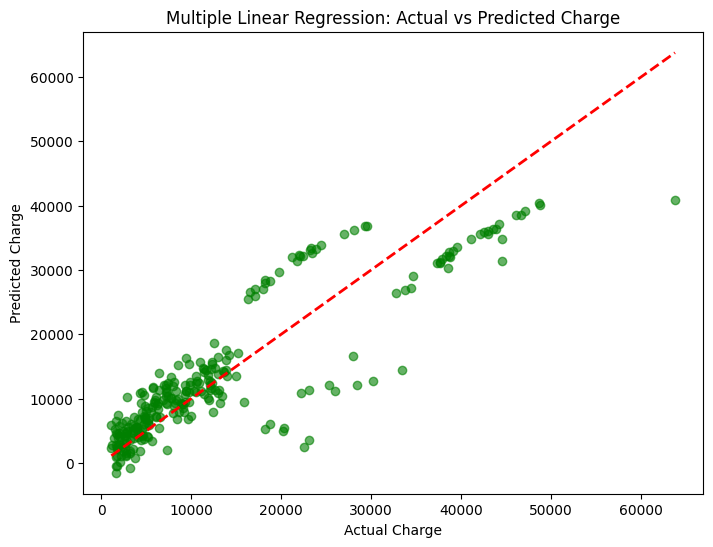

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Charge")
plt.ylabel("Predicted Charge")
plt.title("Multiple Linear Regression: Actual vs Predicted Charge")
plt.show()

#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

Ridge MSE: 20637418.125246916
Lasso MSE: 20655995.439473562


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X = df[['bmi']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error", mse ** (1/2))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Squared Error: 152452515.64886093
Root Mean Squared Error 12347.166300364668
Mean Absolute Error: 9863.434994766281


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


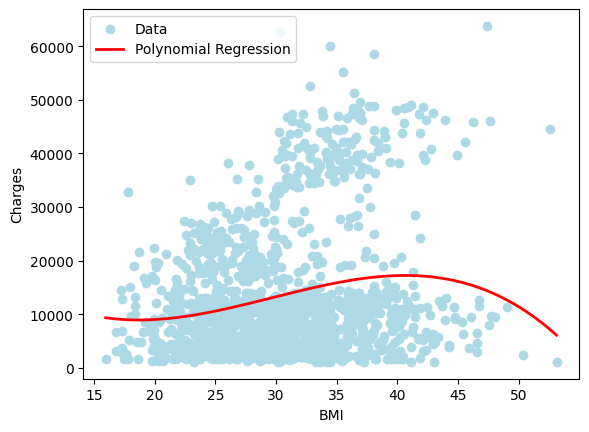

In [ ]:
plt.scatter(X, y, color="lightblue", label="Data")
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Polynomial Regression")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Assignement 1/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Encode target: 'M' (malignant) = 1, 'B' (benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
 [[71  1]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



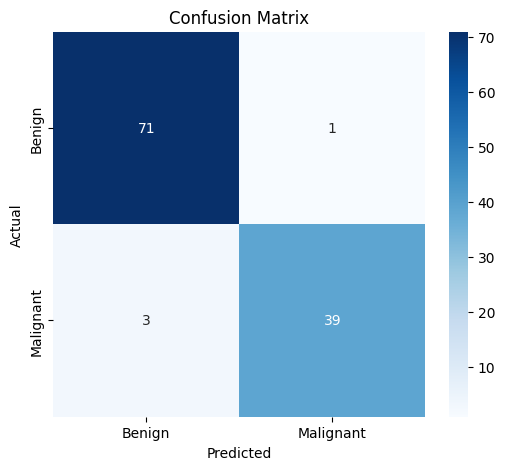

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()